### Como ir Além
Após cumprir as seções obrigatórias, você poderá escolher ao menos uma opção para fazer seu projeto se destacar. As opções são:

#### Visualização Hierárquica
O projeto apresenta uma forma de visualizar a propagação do cumprimento (ou não) de metas ao longo dos níveis hierárquicos da empresa

#### Desdobramentos de Metas por hierarquia
O projeto apresenta conclusões sobre o desdobramento de metas por nível hierárquico, ou seja, responde às perguntas: Se os funcionários que respondem para um gestor cumprem suas metas, o gestor também cumpre a sua? O inverso é verdadeiro? Essa relação hierárquica é significativa para o cumprimento de metas?

#### Relações de Metas e áreas
O projeto apresenta conclusões sobre o cumprimento de metas entre áreas e é capaz de responder as perguntas: Quando a área 1 bate as metas, alguma outra área não bate?

#### Relação entre Regiões
O cumprimento de metas de uma região afeta as outras regiões?

#### Visualização do Status mensal da Empresa
O projeto contém um Dashboard que permita a análise do cumprimento das metas da empresa toda em apenas um local.

------------------

### Premissa
*O quanto foi cumprido da meta para um funcionário é o atingido no mês dele.*

In [1]:
import pandas as pd
from plot_helper import diag_corr, bars
import seaborn as sns
%matplotlib inline

In [2]:
df_full = pd.read_pickle('../data/interim/ambev-final-dataset.pkl')
df_full = df_full[df_full.status_meta != 'nan'] # removendo o que nao é meta
df_full['target'] = df_full.groupby(
    ['id_funcionario']).ating_mes.transform('mean') / 100

## Visualização do Status mensal da Empresa

In [18]:
local = 'area_regional'
por_reg = df_full.groupby(['mes', local]).target.agg('mean').unstack()

In [3]:

# df = df.drop('ating_mes', axis=1)
# df = df.groupby(['id_funcionario']).agg('first').reset_index()

In [4]:
# hierarquia = df.groupby(['id_funcionario', 'id_gestor']).ating_mes.agg('mean')

## Relação entre Regiões


In [5]:
por_reg = df_full.groupby(['mes', 'area_regional']).target.agg('mean').unstack()

In [6]:
# ajustando os nomes das colunas para conseguir ordernar
por_reg.columns = [format(int(x), '02d') for x in por_reg.columns.values]

In [7]:
por_reg = por_reg.reindex(sorted(por_reg.columns), axis=1)

In [8]:
corr = por_reg.corr()

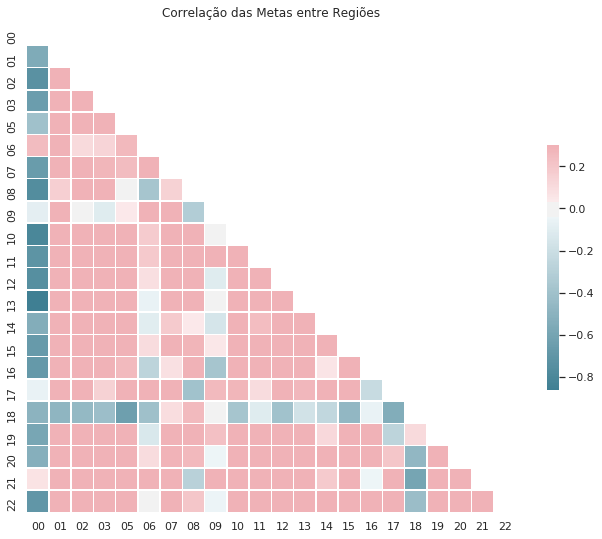

In [9]:
diag_corr(corr, 'Correlação das Metas entre Regiões')

In [10]:
smax = corr.columns.to_series() + ' -> ' + corr[corr<1].idxmax()
smin = corr.columns.to_series() + ' -> ' + corr.idxmin()
vmax = corr[corr<1].max()
vmin = corr.min()

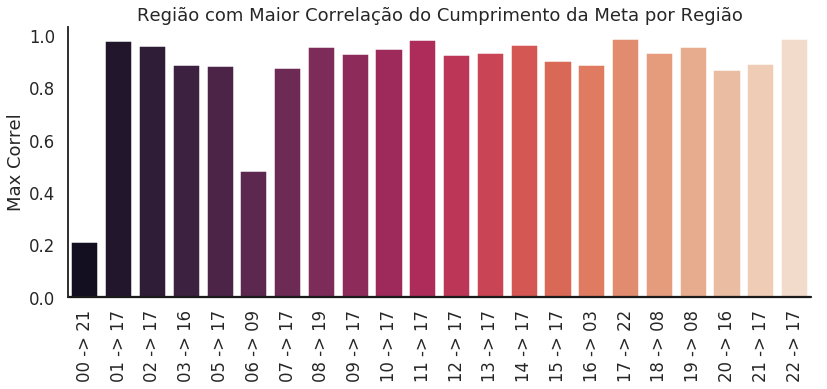

In [11]:
bars(smax, vmax, 'Max Correl', 'Região com Maior Correlação do Cumprimento da Meta por Região')

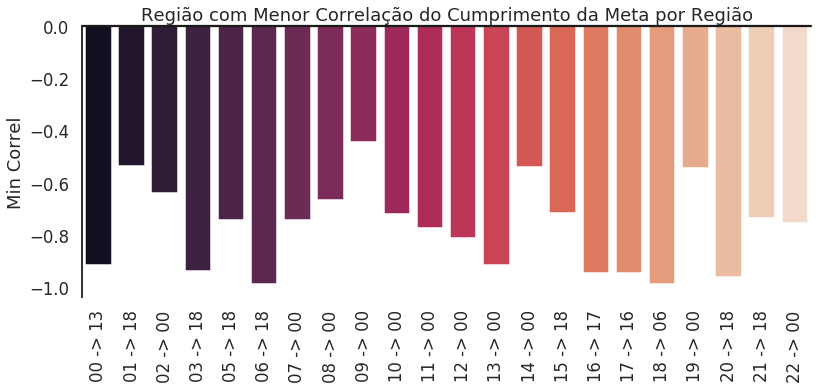

In [12]:
bars(smin, vmin, 'Min Correl', 'Região com Menor Correlação do Cumprimento da Meta por Região')